# Example of Obspy taup

### - Manual: https://docs.obspy.org/packages/obspy.taup.html

In [1]:
from obspy.taup import TauPyModel

### Read the velocity model
#model = TauPyModel(model="iasp91")
model = TauPyModel(model="ak135")
#model = TauPyModel(model="herrin")
#model = TauPyModel(model="jb")
#model = TauPyModel(model="prem")

### If you want to create taup model from velocity structure
# You can convert from .nd (text file) to .npz (binary file)

import os
from obspy.taup import taup_create

#os.chdir('/Users/rkiuchi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/obspy/taup/data')
os.chdir('/Users/ryota/anaconda/lib/python3.6/site-packages/obspy/taup/data/')
taup_create.build_taup_model('ak135f.nd')


Building obspy.taup model for 'ak135f.nd' ...


## - Calculate travel time

In [2]:
# Calculate all phases
arrivals = model.get_travel_times(source_depth_in_km=55, distance_in_degree=67)
print(arrivals)  


# Calculate selected phases
arrivals = model.get_travel_times(source_depth_in_km=55, distance_in_degree=40, phase_list=["P", "pP", "sP"])
print(arrivals)  


28 arrivals
	P phase arrival at 647.020 seconds
	pP phase arrival at 662.215 seconds
	sP phase arrival at 668.395 seconds
	PcP phase arrival at 675.085 seconds
	PP phase arrival at 795.106 seconds
	PKiKP phase arrival at 1034.308 seconds
	pPKiKP phase arrival at 1050.739 seconds
	sPKiKP phase arrival at 1056.646 seconds
	S phase arrival at 1176.373 seconds
	pS phase arrival at 1194.624 seconds
	SP phase arrival at 1196.318 seconds
	sS phase arrival at 1201.935 seconds
	PS phase arrival at 1204.590 seconds
	SKS phase arrival at 1239.435 seconds
	SKKS phase arrival at 1239.445 seconds
	ScS phase arrival at 1239.839 seconds
	SKiKP phase arrival at 1242.786 seconds
	pSKS phase arrival at 1260.361 seconds
	sSKS phase arrival at 1266.675 seconds
	SS phase arrival at 1435.742 seconds
	PKIKKIKP phase arrival at 1856.311 seconds
	SKIKKIKP phase arrival at 2064.780 seconds
	PKIKKIKS phase arrival at 2070.687 seconds
	SKIKKIKS phase arrival at 2278.959 seconds
	PKIKPPKIKP phase arrival at 2355.20

## - Calculate ray parameters

In [3]:
# Calculate selected phases
arrivals = model.get_travel_times(source_depth_in_km=55, \
                                  distance_in_degree=40, \
                                  phase_list=["P", "pP", "sP"])
print(arrivals)

# Choose phase you want to know
arr = arrivals[0]

print("Ray parameter = ", arr.ray_param, \
      "Incident angle = ",arr.incident_angle, \
      "Takeoff angle = ", arr.takeoff_angle)


3 arrivals
	P phase arrival at 449.307 seconds
	pP phase arrival at 463.510 seconds
	sP phase arrival at 469.925 seconds
Ray parameter =  474.91656114610925 Incident angle =  25.616931419706454 Takeoff angle =  37.20909557204138


## - Get ray paths and Plot

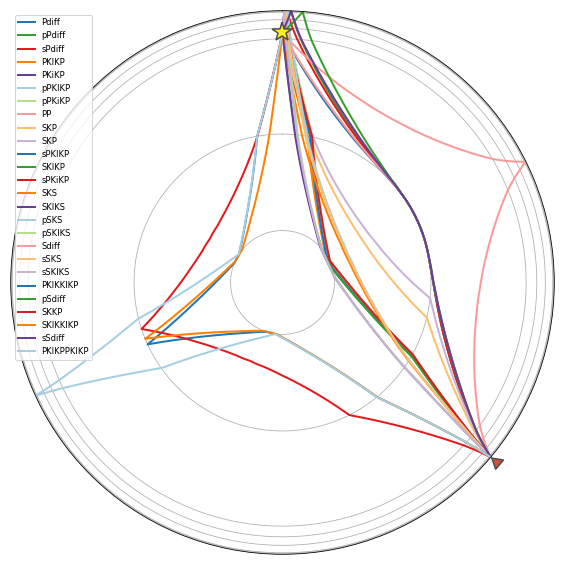

In [4]:
arrivals = model.get_ray_paths(source_depth_in_km=500, distance_in_degree=130, phase_list=["ttbasic"])
ax = arrivals.plot()